# Chapter 7 - Doing Basic Statistics with Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# line to allow the plots to be showed in the Jupyter notebook
%matplotlib inline

## 7.1 Data Preparation

In [2]:
games = pd.read_csv('data/appstore_games.csv')

In [3]:
games.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [4]:
games.shape

(17007, 18)

In [5]:
original_colums_dict = {x: x.lower().replace(' ','_') for x in games.columns}
original_colums_dict

{'URL': 'url',
 'ID': 'id',
 'Name': 'name',
 'Subtitle': 'subtitle',
 'Icon URL': 'icon_url',
 'Average User Rating': 'average_user_rating',
 'User Rating Count': 'user_rating_count',
 'Price': 'price',
 'In-app Purchases': 'in-app_purchases',
 'Description': 'description',
 'Developer': 'developer',
 'Age Rating': 'age_rating',
 'Languages': 'languages',
 'Size': 'size',
 'Primary Genre': 'primary_genre',
 'Genres': 'genres',
 'Original Release Date': 'original_release_date',
 'Current Version Release Date': 'current_version_release_date'}

In [6]:
games.rename(
    columns = original_colums_dict,
    inplace = True
)

In [7]:
games.set_index(
    keys = 'id',
    inplace = True
)

In [8]:
games.drop(
    columns = ['url', 'icon_url'],
    inplace = True
)

In [9]:
games.head()

,name,subtitle,average_user_rating,user_rating_count,price,in-app_purchases,description,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date
id,,,,,,,,,,,,,,,
284921427,Sudoku,NaN,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
284926400,Reversi,NaN,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
284946595,Morocco,NaN,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
285755462,Sudoku (Free),NaN,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
285831220,Senet Deluxe,NaN,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [10]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17007 entries, 284921427 to 1475076711
Data columns (total 15 columns):
name                            17007 non-null object
subtitle                        5261 non-null object
average_user_rating             7561 non-null float64
user_rating_count               7561 non-null float64
price                           16983 non-null float64
in-app_purchases                7683 non-null object
description                     17007 non-null object
developer                       17007 non-null object
age_rating                      17007 non-null object
languages                       16947 non-null object
size                            17006 non-null float64
primary_genre                   17007 non-null object
genres                          17007 non-null object
original_release_date           17007 non-null object
current_version_release_date    17007 non-null object
dtypes: float64(4), object(11)
memory usage: 2.1+ MB


In [11]:
games['original_release_date'] = pd.to_datetime(games['original_release_date'])
games['current_version_release_date'] = pd.to_datetime(games['current_version_release_date'])

In [12]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17007 entries, 284921427 to 1475076711
Data columns (total 15 columns):
name                            17007 non-null object
subtitle                        5261 non-null object
average_user_rating             7561 non-null float64
user_rating_count               7561 non-null float64
price                           16983 non-null float64
in-app_purchases                7683 non-null object
description                     17007 non-null object
developer                       17007 non-null object
age_rating                      17007 non-null object
languages                       16947 non-null object
size                            17006 non-null float64
primary_genre                   17007 non-null object
genres                          17007 non-null object
original_release_date           17007 non-null datetime64[ns]
current_version_release_date    17007 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(9)
mem

In [13]:
games.head()

,name,subtitle,average_user_rating,user_rating_count,price,in-app_purchases,description,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date
id,,,,,,,,,,,,,,,
284921427,Sudoku,NaN,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2008-11-07,2017-05-30
284926400,Reversi,NaN,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",2008-11-07,2018-05-17
284946595,Morocco,NaN,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",2008-11-07,2017-05-09
285755462,Sudoku (Free),NaN,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",2008-07-23,2017-05-30
285831220,Senet Deluxe,NaN,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",2008-07-18,2018-07-22


In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17007 entries, 284921427 to 1475076711
Data columns (total 15 columns):
name                            17007 non-null object
subtitle                        5261 non-null object
average_user_rating             7561 non-null float64
user_rating_count               7561 non-null float64
price                           16983 non-null float64
in-app_purchases                7683 non-null object
description                     17007 non-null object
developer                       17007 non-null object
age_rating                      17007 non-null object
languages                       16947 non-null object
size                            17006 non-null float64
primary_genre                   17007 non-null object
genres                          17007 non-null object
original_release_date           17007 non-null datetime64[ns]
current_version_release_date    17007 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(9)
mem

In [15]:
games.isnull().sum()

name                                0
subtitle                        11746
average_user_rating              9446
user_rating_count                9446
price                              24
in-app_purchases                 9324
description                         0
developer                           0
age_rating                          0
languages                          60
size                                1
primary_genre                       0
genres                              0
original_release_date               0
current_version_release_date        0
dtype: int64

In [16]:
np.array_equal(
    games['average_user_rating'].isnull(),
    games['user_rating_count'].isnull()
)

True

In [17]:
games = games.loc[games['average_user_rating'].notnull()]

In [18]:
games = games.loc[games['user_rating_count'] >= 30]

In [19]:
games.shape

(4311, 15)

In [20]:
games.isnull().sum()

name                               0
subtitle                        2523
average_user_rating                0
user_rating_count                  0
price                              0
in-app_purchases                1313
description                        0
developer                          0
age_rating                         0
languages                         14
size                               0
primary_genre                      0
genres                             0
original_release_date              0
current_version_release_date       0
dtype: int64

###  7.1.5 Exercise: further data preparation

## 7.2 Using descriptive statistics to make sense of data

In [26]:
random_ratings = games['average_user_rating'].sample(n=300)
for r in random_ratings:
    print(r, end=', ')

4.5, 4.5, 3.5, 4.5, 4.5, 3.0, 4.5, 4.5, 4.0, 4.0, 4.5, 4.5, 2.5, 3.0, 4.5, 2.5, 5.0, 4.5, 3.0, 2.5, 4.5, 4.0, 5.0, 4.5, 4.0, 3.5, 4.5, 4.0, 5.0, 4.0, 3.5, 4.0, 4.0, 4.0, 4.5, 4.5, 3.5, 4.0, 4.5, 4.5, 4.5, 3.0, 3.0, 4.5, 4.5, 5.0, 4.0, 4.0, 5.0, 3.5, 4.5, 4.0, 4.0, 4.5, 4.5, 4.5, 5.0, 4.0, 3.5, 3.5, 4.5, 3.5, 4.5, 4.5, 5.0, 4.5, 5.0, 4.0, 4.0, 3.0, 4.5, 4.5, 4.0, 3.0, 3.5, 4.0, 3.5, 3.5, 3.5, 4.5, 4.5, 4.5, 4.0, 5.0, 4.5, 3.5, 4.5, 3.5, 1.5, 4.0, 4.5, 4.5, 4.5, 4.5, 3.5, 4.5, 4.5, 4.5, 4.0, 3.5, 4.5, 3.5, 4.5, 5.0, 4.0, 4.5, 4.0, 4.5, 4.5, 4.5, 4.0, 4.5, 3.0, 3.5, 4.5, 4.0, 4.5, 3.0, 4.5, 4.5, 4.5, 4.0, 2.5, 4.0, 4.5, 4.5, 4.5, 4.0, 4.5, 4.5, 3.0, 3.5, 3.0, 2.5, 4.5, 4.5, 4.5, 5.0, 1.5, 4.5, 4.5, 4.0, 4.5, 4.5, 2.5, 4.5, 3.5, 5.0, 4.0, 4.5, 4.5, 3.5, 4.0, 4.0, 3.5, 4.5, 4.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, 4.0, 2.5, 4.0, 4.5, 4.5, 4.5, 3.0, 3.0, 4.5, 3.5, 3.0, 3.5, 4.5, 4.5, 4.0, 4.5, 4.5, 4.0, 5.0, 4.0, 4.5, 3.5, 4.0, 5.0, 4.5, 4.0, 4.0, 3.5, 4.0, 4.5, 4.5, 4.5, 4.5, 4.0, 4.5, 4.0, 5.0, 

In [27]:
np.random.seed(13)
mens_heights = np.random.normal(1.75, 0.1, 24)
mens_heights = np.round(mens_heights, 2)
mens_heights

array([1.68, 1.83, 1.75, 1.8 , 1.88, 1.8 , 1.89, 1.84, 1.9 , 1.65, 1.67,
       1.62, 1.81, 1.73, 1.84, 1.78, 1.76, 1.97, 1.81, 1.75, 1.65, 1.87,
       1.85, 1.64])

In [28]:
mens_heights.mean()

1.7820833333333332

In [29]:
mens_heights.std()

0.09210407006328344

In [30]:
np.random.seed(14)
mens_heights2 = np.random.normal(1.75, 0.01, 24)
mens_heights2 = np.round(mens_heights2, 2)
mens_heights2

array([1.77, 1.75, 1.75, 1.75, 1.73, 1.75, 1.73, 1.75, 1.74, 1.76, 1.75,
       1.75, 1.74, 1.76, 1.75, 1.76, 1.76, 1.76, 1.75, 1.73, 1.74, 1.76,
       1.76, 1.76])

In [31]:
mens_heights = pd.Series(
    [1.68, 1.83, 1.75, 1.8, 1.88, 1.8, 1.89, 1.84,
     1.9, 1.65, 1.67,1.62, 1.81, 1.73, 1.84, 1.78,
     1.76, 1.97, 1.81, 1.75, 1.65, 1.87, 1.85, 1.64]
)

In [32]:
mens_heights_2 = pd.Series(
    [1.77, 1.75, 1.75, 1.75, 1.73, 1.75, 1.73, 1.75,
     1.74, 1.76, 1.75, 1.75, 1.74, 1.76, 1.75, 1.76,
     1.76, 1.76, 1.75, 1.73, 1.74, 1.76, 1.76, 1.76]
)

In [33]:
mens_heights_2.mean()

1.7504166666666665

In [34]:
mens_heights_2.std()

0.010826363421183332

In [35]:
for h in mens_heights:
    print(h, end= ', ')

1.68, 1.83, 1.75, 1.8, 1.88, 1.8, 1.89, 1.84, 1.9, 1.65, 1.67, 1.62, 1.81, 1.73, 1.84, 1.78, 1.76, 1.97, 1.81, 1.75, 1.65, 1.87, 1.85, 1.64, 

In [36]:
mens_heights.sort_values()

11    1.62
23    1.64
20    1.65
9     1.65
10    1.67
0     1.68
13    1.73
19    1.75
2     1.75
16    1.76
15    1.78
5     1.80
3     1.80
18    1.81
12    1.81
1     1.83
7     1.84
14    1.84
22    1.85
21    1.87
4     1.88
6     1.89
8     1.90
17    1.97
dtype: float64

In [37]:
mens_heights.quantile([0.25, 0.5, 0.75])

0.25    1.7175
0.50    1.8000
0.75    1.8425
dtype: float64

In [38]:
mens_heights.quantile([0.33, 0.80])

0.33    1.750
0.80    1.858
dtype: float64

In [39]:
mens_heights.describe()

count    24.000000
mean      1.782083
std       0.094085
min       1.620000
25%       1.717500
50%       1.800000
75%       1.842500
max       1.970000
dtype: float64

In [40]:
mens_heights >= 1.8

0     False
1      True
2     False
3      True
4      True
5      True
6      True
7      True
8      True
9     False
10    False
11    False
12     True
13    False
14     True
15    False
16    False
17     True
18     True
19    False
20    False
21     True
22     True
23    False
dtype: bool

In [41]:
(mens_heights >= 1.8).sum()/mens_heights.shape[0]

0.5416666666666666

### 7.2.3 Using descriptive statistics

In [42]:
games.describe()

,average_user_rating,user_rating_count,price,size
count,4311.000000,4.311000e+03,4311.000000,4.311000e+03
mean,4.163535,5.789754e+03,0.677878,1.759569e+08
std,0.596239,5.592425e+04,2.910916,2.866278e+08
min,1.500000,3.000000e+01,0.000000,2.158400e+05
25%,4.000000,7.000000e+01,0.000000,4.073626e+07
50%,4.500000,2.210000e+02,0.000000,9.730048e+07
75%,4.500000,1.192000e+03,0.000000,2.085176e+08
max,5.000000,3.032734e+06,139.990000,4.005591e+09


In [43]:
games['user_rating_count'].sort_values(ascending=False).head(10)

id
529479190     3032734.0
1053012308    1277095.0
1330123889     711409.0
597986893      469562.0
1094591345     439776.0
672150402      400787.0
1270598321     374772.0
1116645064     283035.0
297558390      273687.0
847985808      259030.0
Name: user_rating_count, dtype: float64

In [44]:
(games['user_rating_count'] >= 100000).sum()

40

### 7.2.5 Exercise: calculating descriptive statistics 

## 7.3 Exploratory Data Analysis

In [48]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4311 entries, 284921427 to 1474461379
Data columns (total 15 columns):
name                            4311 non-null object
subtitle                        1788 non-null object
average_user_rating             4311 non-null float64
user_rating_count               4311 non-null float64
price                           4311 non-null float64
in-app_purchases                2998 non-null object
description                     4311 non-null object
developer                       4311 non-null object
age_rating                      4311 non-null object
languages                       4297 non-null object
size                            4311 non-null float64
primary_genre                   4311 non-null object
genres                          4311 non-null object
original_release_date           4311 non-null datetime64[ns]
current_version_release_date    4311 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 5

In [49]:
games['size'] = games['size']/1e6

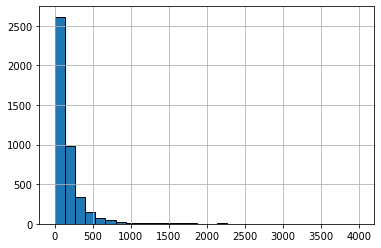

In [50]:
games['size'].hist(bins=30, ec='black');

In [51]:
games['size'].describe()

count    4311.000000
mean      175.956867
std       286.627800
min         0.215840
25%        40.736256
50%        97.300480
75%       208.517632
max      4005.591040
Name: size, dtype: float64

In [52]:
games['size'].sort_values(ascending=False).head(12)

id
1245565445    4005.591040
1106831630    3916.692480
633625517     3747.742720
1235863443    3716.897792
1183898700    3599.435776
881270303     3518.277632
1107741196    3321.082880
909472985     2996.021248
1321791212    2897.696768
1298734617    2581.730304
1264531625    2547.534848
1257031979    2512.028672
Name: size, dtype: float64

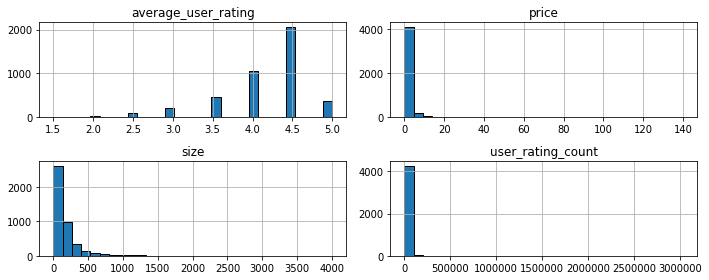

In [53]:
games.hist(
    figsize = (10, 4),
    bins = 30,
    ec = 'black'
);
# This line prints the four plots without overlap
plt.tight_layout()

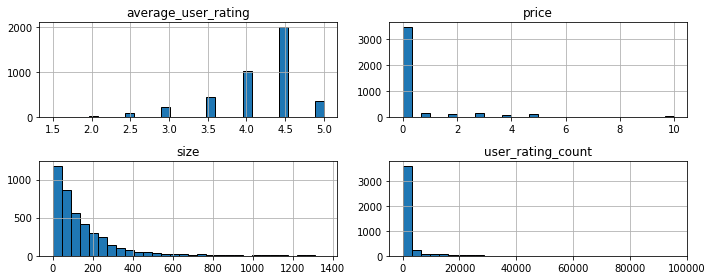

In [54]:
filter_price = games['price'] <= games['price'].quantile(0.99)
filter_user_rating_count = games['user_rating_count'] <= games['user_rating_count'].quantile(0.99)
filter_size = games['size'] <= games['size'].quantile(0.99)
filter_exclude_top_1_percent = filter_price & filter_user_rating_count & filter_size

games[filter_exclude_top_1_percent].hist(
    figsize = (10, 4),
    bins = 30,
    ec = 'black'
);
# This line prints the four plots without overlap
plt.tight_layout()

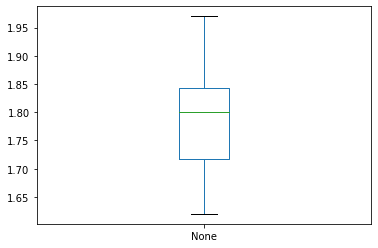

In [55]:
mens_heights.plot(kind='box');

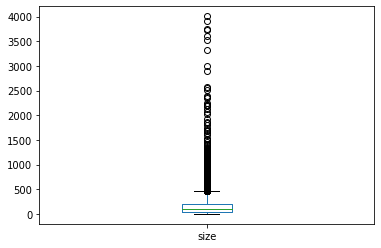

In [56]:
games['size'].plot(kind='box');

In [57]:
games['age_rating'].value_counts()

4+     2287
9+      948
12+     925
17+     151
Name: age_rating, dtype: int64

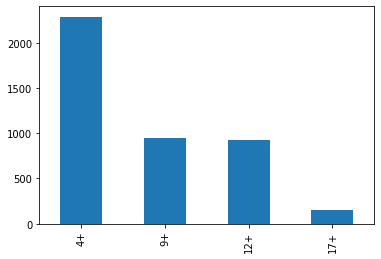

In [58]:
games['age_rating'].value_counts().plot(kind = 'bar');

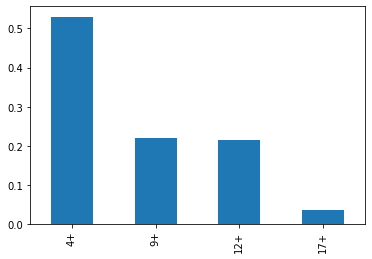

In [59]:
games['age_rating'].value_counts(normalize=True).plot(kind='bar');

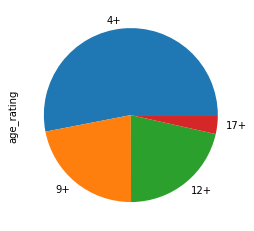

In [60]:
games['age_rating'].value_counts().plot(kind = 'pie');

In [61]:
percentages = 100*games['age_rating'].value_counts(normalize=True)
for k, x in percentages.items():
    print(f'{k}: {x:0.1f}%')

4+: 53.1%
9+: 22.0%
12+: 21.5%
17+: 3.5%


### 7.3.4 Bi-variate EDA: exploring relationships between variables

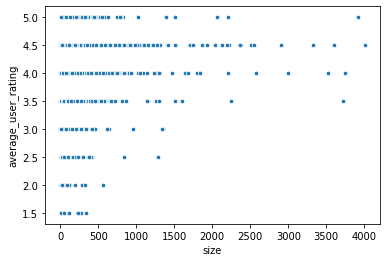

In [62]:
sns.scatterplot(
    x='size',
    y='average_user_rating',
    data=games,
    s=20 # this is for controlling  the size of the points
);

In [63]:
ratings_mapping = {
    1.5: '1_poor',
    2.: '1_poor',
    2.5: '1_poor',
    3.: '1_poor',
    3.5: '2_fair',
    4. : '2_fair',
    4.5: '3_good',
    5. : '4_excellent'
}

games['cat_rating'] = games['average_user_rating'].map(ratings_mapping)

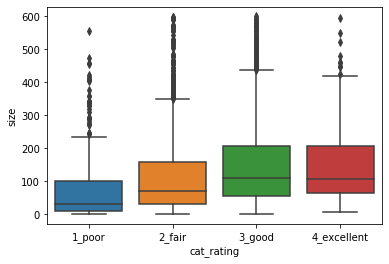

In [64]:
sns.boxplot(
    x='cat_rating',
    y='size',
    data=games[games['size'] <= 600],
    order = ['1_poor', '2_fair', '3_good', '4_excellent']
);

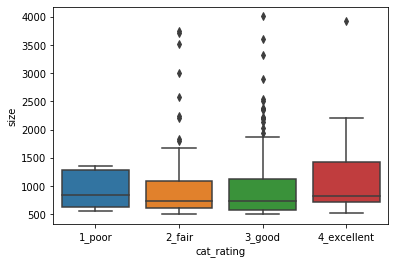

In [65]:
sns.boxplot(
    x='cat_rating',
    y='size',
    data=games[games['size'] > 500],
    order = ['1_poor', '2_fair', '3_good', '4_excellent']
);

In [66]:
pd.crosstab(
    games['age_rating'],
    games['cat_rating']
)

cat_rating,1_poor,2_fair,3_good,4_excellent
age_rating,,,,
12+,57,327,466,75
17+,11,59,68,13
4+,238,821,1029,199
9+,57,309,499,83


In [67]:
100*pd.crosstab(
    games['age_rating'],
    games['cat_rating'],
    normalize='index'
)

cat_rating,1_poor,2_fair,3_good,4_excellent
age_rating,,,,
12+,6.162162,35.351351,50.378378,8.108108
17+,7.284768,39.072848,45.033113,8.609272
4+,10.406646,35.898557,44.993441,8.701355
9+,6.012658,32.594937,52.637131,8.755274


### 7.3.5 Exercise: practicing EDA  